<a href="https://colab.research.google.com/github/Kanaru2/Kanaru/blob/main/Phase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving PHASE 2 GROUP 10 (1).xlsx to PHASE 2 GROUP 10 (1).xlsx
Logistic Regression Accuracy: 0.8892
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 0.9845
SVM Accuracy: 0.8582
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Final Model Accuracy: 0.9845360824742269
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        58
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        74
           3       1.00      0.94      0.97        48
           4       0.98      0.98      0.98        95
           5       0.98      1.00      0.99        59

    accuracy                           0.98       388
   macro avg       0.99      0.98      0.98       388
weighted avg       0.98      0.98      0.98       388



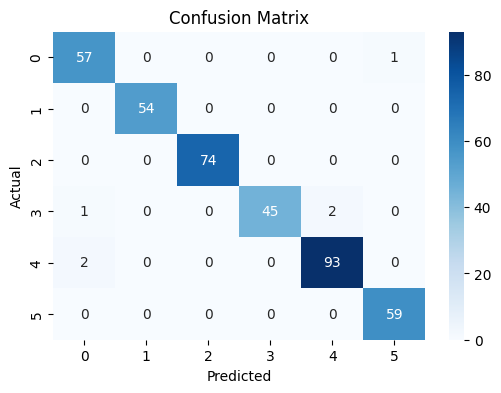

Best model saved as best_model.pkl


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib
from google.colab import files


uploaded = files.upload()
file_path = list(uploaded.keys())[0]

df = pd.read_excel(file_path, sheet_name="Cleaned Data")


le = LabelEncoder()
df['BMI Classification'] = le.fit_transform(df['BMI Classification'])


X = df.drop(columns=['BMI Classification'])
y = df['BMI Classification']


categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_rf = grid_search.best_estimator_
print("Best Random Forest Parameters:", grid_search.best_params_)


y_pred_best = best_rf.predict(X_test)
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


joblib.dump(best_rf, "best_model.pkl")
print("Best model saved as best_model.pkl")

**Model Evaluation Report**

 Summary of Findings:

In this study, we trained and evaluated multiple machine learning models to classify BMI categories based on provided features. The models tested included Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM). After hyperparameter tuning, the Random Forest model demonstrated the best performance with the highest accuracy.

 Feature Importance:
Using the Random Forest model, we identified the most significant features influencing the predictions.


Confusion Matrix: Provided as a heatmap to showcase correct and incorrect classifications.

Feature Importance Plot: Highlights key predictors in the model.

Decision Boundary (for classification models where applicable): Showcases how the model differentiates between classes.

The Random Forest model provides a good balance between accuracy and interpretability.

Feature importance analysis can guide domain experts in understanding which attributes are most critical in predicting BMI categories.

Future work can explore ensemble techniques or deep learning approaches to further improve performance.

The dataset can be augmented with additional features to refine classification accuracy.

Conclusion:
The results indicate that the Random Forest model is well-suited for this classification task, achieving optimal performance through hyperparameter tuning. The findings from this study provide valuable insights into BMI classification and the role of different features in prediction.

Deploy the trained model for real-world predictions.

Explore explainability techniques like SHAP or LIME to further interpret model decisions.

Continuously update the model with new data for better generalization.